### K - Nearest Neighbour Classification (Dataset IRIS)

##### Data process of a data sceinse project

    - ACQUIRE Data acquisition - Import raw dataset into your analytics platform
    - PREPARE Data preprocessing - Explore and visualize. Perform data cleaning
    - ANALYZE Data analysis - Use statistical analysis and machine learning
    - REPORT Presentation and reportimg og insights - Present your finding who need ro take action
    - ACT Turning these insights into data-driven actions - Use the insughts to take the actions

In this example we will trying to classify an Iris flower species

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Iris.csv')

In [14]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/jupyter/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


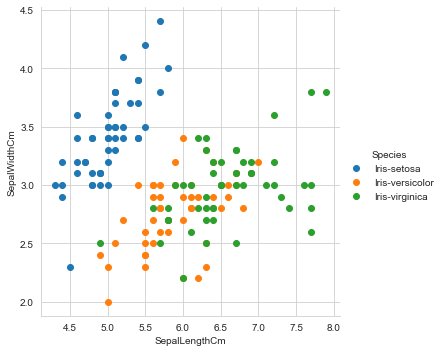

In [46]:
g = sns.FacetGrid(df, hue="Species", size=5)
g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
g.add_legend()

KNN classifiers do not accept string label. we encode labels before modelling the date. 

In [21]:
#to split data into features and labels
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

#label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/opt/homebrew/Caskroom/miniforge/base/envs/jupyter/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

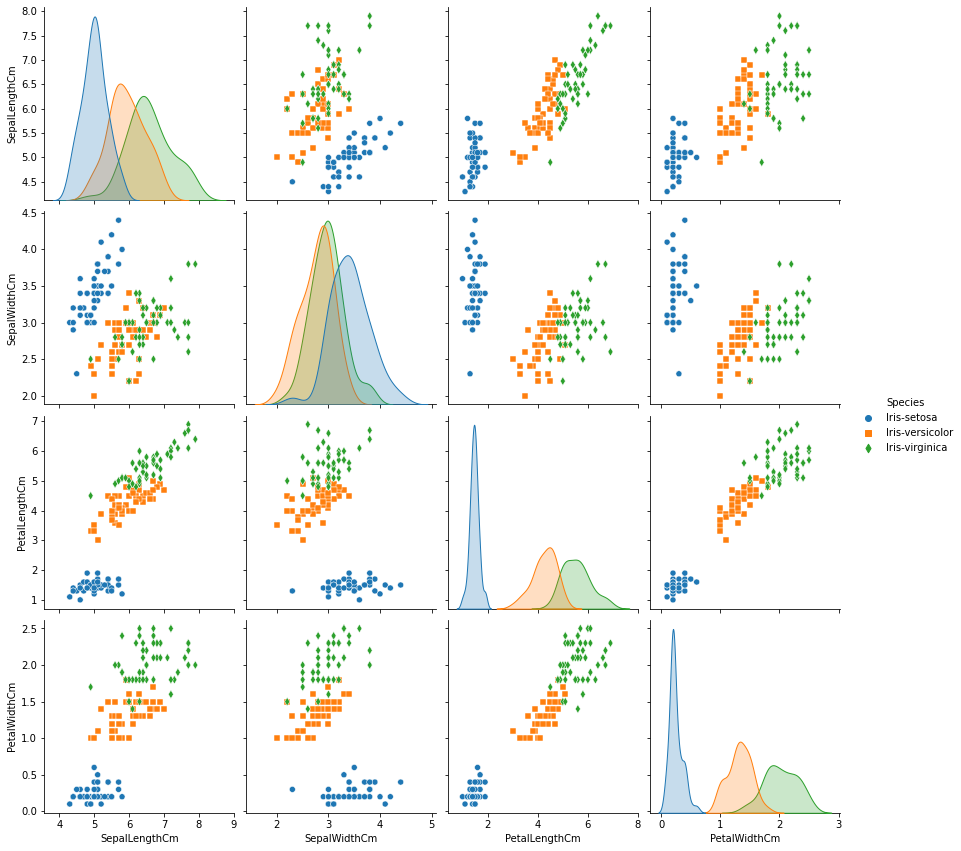

In [25]:
#visualizing Dataset Pairplot
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size = 3, markers=["o", "s", "d"])
plt.show()



<Figure size 432x288 with 0 Axes>

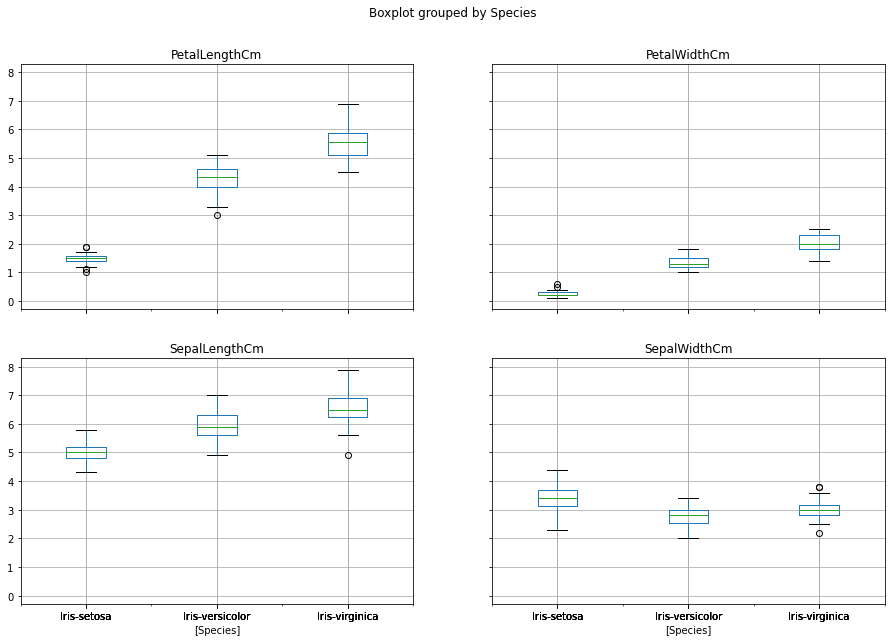

In [27]:
plt.figure()
df.drop("Id", axis=1).boxplot(by = "Species", figsize = (15,10))
plt.show()

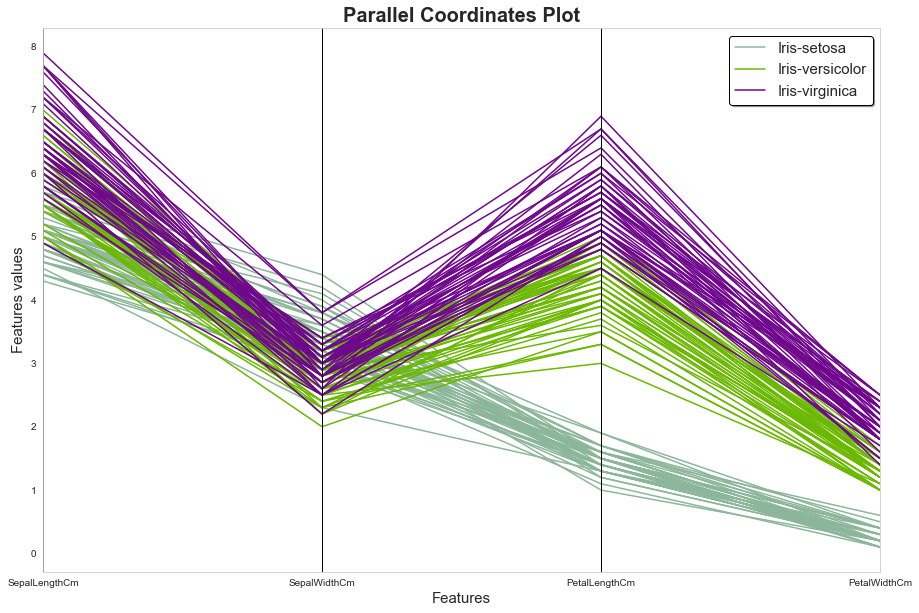

In [48]:

from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("Id", axis=1), "Species")

plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<AxesSubplot:>

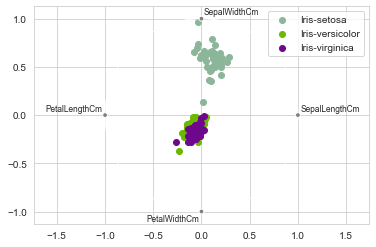

In [49]:
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")

Split thr dataset and fitting the model.
we will by dividing the dataset into 80% training data and 20% testing data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Since in this example the features are in the same order of magnitude, no feature scaling is to be performed on the dataset. However it is recommended to normalize and scale the dataset before fitting a classifier.

#### Evaluating the predictions and cross validating

In [31]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [32]:
#Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [35]:
#Performing 10 fold Cross Validation
k_list = list(range(1,50,2))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    


<Figure size 432x288 with 0 Axes>

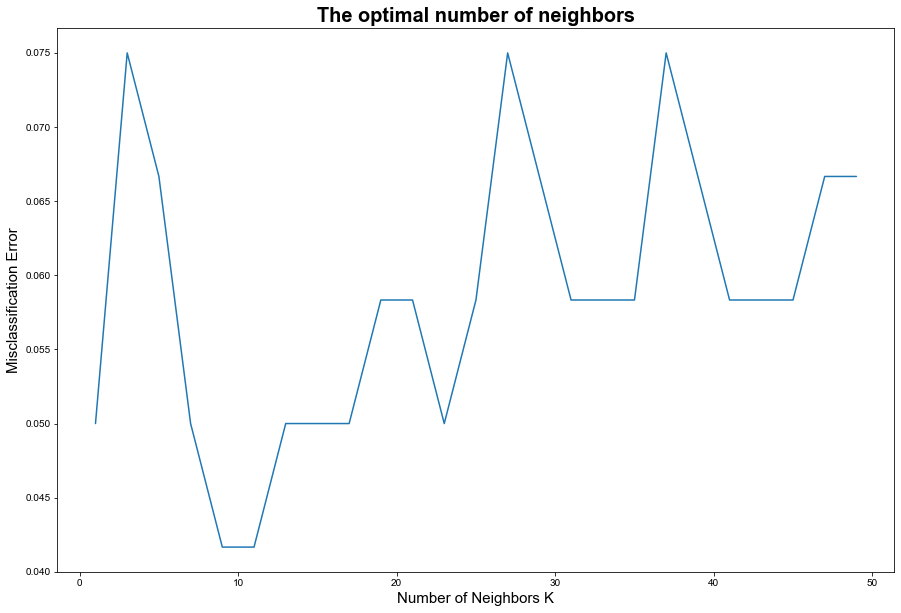

In [36]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [37]:
#Finding Best K
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
